# Extrahieren

Zum Extrahieren von PMTiles benötigt ihr das `pmtiles`-Kommandozeilenwerkzeug. Ihr könnt es einfach von [GitHub](https://github.com/protomaps/go-pmtiles/releases) herunterladen.

Für macOS könnt ihr alternativ [Homebrew](https://brew.sh/) verwenden:
```console
$ brew install pmtiles
```

## Metainformationen anzeigen lassen

Zur Anzeige von Metainformationen zu einer Basiskarte in https://maps.protomaps.com/builds könnt ihr `pmtiles show` verwenden:

In [1]:
!pmtiles show 

pmtiles spec version: 3
tile type: Vector Protobuf (MVT)
bounds: (long: -180.000000, lat: -85.051129) (long: 180.000000, lat: 85.051129)
min zoom: 0
max zoom: 15
center: (long: 0.000000, lat: 0.000000)
center zoom: 0
addressed tiles count: 1431655765
tile entries count: 149402727
tile contents count: 129273806
clustered: true
internal compression: 2
tile compression: 2
vector_layers <object...>
description Basemap layers derived from OpenStreetMap and Natural Earth
pgf:devanagari:name NotoSansDevanagari-Regular
pgf:devanagari:version 1
planetiler:buildtime 2025-05-06T00:22:16.609Z
planetiler:githash 2c91725f6d048fd60b02d3e7c29bb88838451048
planetiler:osm:osmosisreplicationseq 111045
planetiler:osm:osmosisreplicationtime 2025-05-14T04:00:00Z
attribution <a href="https://www.openstreetmap.org/copyright" target="_blank">&copy; OpenStreetMap</a>
name Protomaps Basemap
planetiler:osm:osmosisreplicationurl https://planet.osm.org/replication/hour/
planetiler:version 0.9.0
type baselayer
versi

## Extrahieren eines Bereich

Wir können nun eine Teilmenge der Planetendatei, `berlin.pmtiles`, erstellen, die nur Kacheln enthält, die einer entsprechenden *Bounding Box* entsprechen.

<div class="admonition note">
    <p class="admonition-title">Bemerkung</p>

    Die Begrenzungsrahmen eures Bereichs könnt ihr z.B. mit [bboxfinder.com](https://bboxfinder.com/) ermitteln.
</div>

In [2]:
!pmtiles extract https://build.protomaps.com/20250514.pmtiles berlin.pmtiles --bbox=13.088348,52.338245,13.761159,52.675508

fetching 10 dirs, 10 chunks, 8 requests
Region tiles 4337, result tile entries 4337
fetching 4337 tiles, 152 chunks, 49 requests
fetching chunks 100% |██████████████████████████| (84/84 MB, 4.7 MB/s)         
Completed in 25.919422417s with 4 download threads (167.3262591734201 tiles/s).
Extract required 60 total requests.
Extract transferred 88 MB (overfetch 0.05) for an archive size of 84 MB


Alternativ können wir den Begrenzungsrahmen auch aus einer GeoJSON-Datei extrahieren:

In [3]:
!curl https://tsb-opendata.s3.eu-central-1.amazonaws.com/bezirksgrenzen/bezirksgrenzen.geojson --output berlin.geojson
!pmtiles extract https://build.protomaps.com/20250514.pmtiles berlin.pmtiles --region="berlin.geojson"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1213k  100 1213k    0     0  3215k      0 --:--:-- --:--:-- --:--:-- 3209k
fetching 10 dirs, 10 chunks, 8 requests
Region tiles 2481, result tile entries 2481
fetching 2481 tiles, 146 chunks, 55 requests
fetching chunks 100% |██████████████████████████| (68/68 MB, 4.4 MB/s)         
Completed in 24.990571792s with 4 download threads (99.27744016743814 tiles/s).
Extract required 66 total requests.
Extract transferred 71 MB (overfetch 0.05) for an archive size of 68 MB


Wir können auch nur die Zoomstufen 0 bis 6 und damit nur 813 kB herunterladen:

In [4]:
!pmtiles extract https://build.protomaps.com/20250514.pmtiles berlin.pmtiles --region="berlin.geojson"  --maxzoom=6

fetching 1 dirs, 1 chunks, 1 requests
Region tiles 8, result tile entries 8
fetching 8 tiles, 7 chunks, 7 requests
fetching chunks 100% |█████████████████████████| (794/794 kB, 431 kB/s)        
Completed in 6.001842375s with 4 download threads (1.332924033016977 tiles/s).
Extract required 11 total requests.
Extract transferred 813 kB (overfetch 0.05) for an archive size of 813 kB


## Ansicht der Basiskarte

[pmtiles.io](https://pmtiles.io) ist ein Viewer für Basiskarten. Klickt auf *Datei auswählen* und wählt anschließend die Datei `berlin.pmtiles` aus:

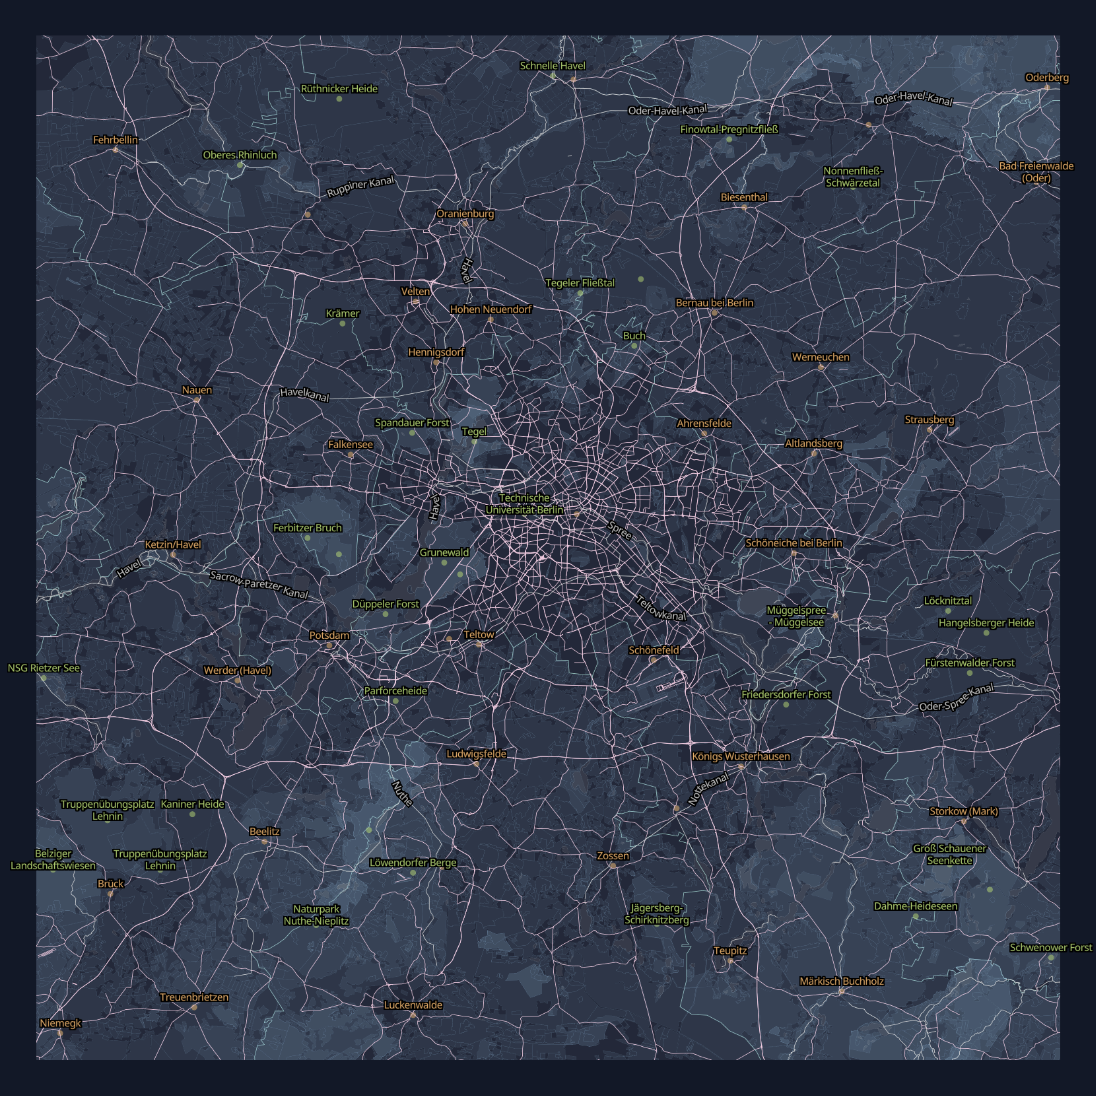